<a href="https://colab.research.google.com/github/supritat/EIP4/blob/master/session_1/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


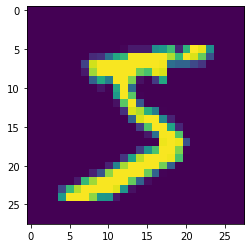

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3,  activation='relu'))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 33s 552us/step - loss: 0.1118 - acc: 0.9671
Epoch 2/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0438 - acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0343 - acc: 0.9893
Epoch 4/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0255 - acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0215 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0192 - acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.0153 - acc: 0.9954
Epoch 8/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0144 - acc: 0.9955
Epoch 9/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0118 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 25s 421us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.030363215968341548, 0.9933]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[7.4561369e-14 1.3360334e-19 2.1103574e-10 3.9305309e-11 3.2189737e-17
  3.3894427e-14 1.8179386e-20 1.0000000e+00 2.9153659e-16 1.9603741e-12]
 [1.8676484e-14 4.3094333e-14 1.0000000e+00 2.4936852e-14 4.4652045e-15
  1.4707451e-22 2.5781794e-13 1.1245441e-16 1.1365956e-13 5.8200788e-16]
 [1.5722836e-13 1.0000000e+00 1.4165154e-11 2.6212271e-14 5.0599862e-09
  2.0109958e-10 5.6216844e-11 1.8886929e-08 2.0292670e-10 5.5345596e-11]
 [1.0000000e+00 4.1298876e-24 7.6243331e-16 4.1431910e-16 4.6002566e-14
  1.8637446e-14 3.1236670e-11 3.6178640e-17 1.8697745e-12 3.3121171e-12]
 [1.9010525e-20 6.2615551e-19 8.1180830e-21 6.3795174e-22 1.0000000e+00
  2.9907770e-19 3.9674031e-17 8.3229161e-19 4.0282163e-19 6.8331826e-16]
 [4.3490635e-11 9.9999928e-01 9.9322994e-09 9.0526545e-14 6.3130322e-08
  3.1579128e-11 2.5858727e-11 7.0221103e-07 5.0201558e-09 1.6400271e-10]
 [1.5700346e-26 2.7079218e-15 6.8382379e-17 5.6586268e-22 1.0000000e+00
  4.2693160e-16 5.6174543e-17 6.6446092e-16 1.3185841e-10 

In [22]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
for a in layer_dict:
  print(a)

conv2d_4
conv2d_5
conv2d_6
conv2d_7
conv2d_8
max_pooling2d_1
conv2d_9
flatten_2
activation_2


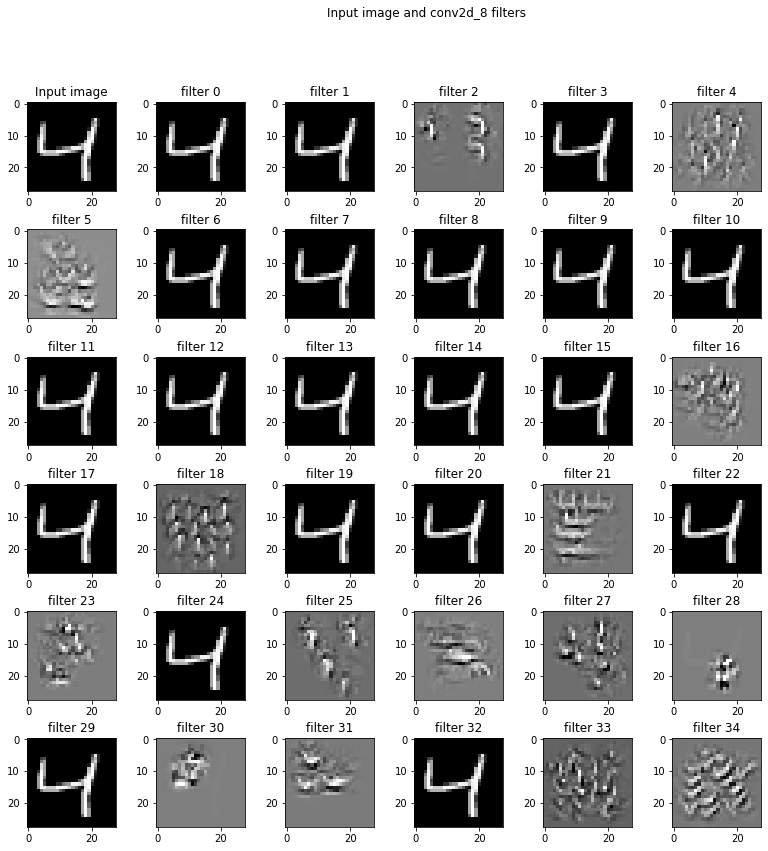

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()